In [52]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from simulation import data
import pandas
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from player_dicts import *

In [6]:
#get player data from result page
DATA = data.parse(PLAYER_ID)

|==============================| 100% | Done!


In [96]:
#define the lanes for the CUP system
lanes_e = [ 'E'+str(i) for i in [1,3,4,5,12,13,14,16,17 ]]
lanes_f = [ 'F'+str(i) for i in [2,4,7,8,12,13,15,17,18]]
LANES = [*lanes_e,*lanes_f]
LANES_ALL = [*[ 'E'+str(i+1) for i in range(18)],
             *[ 'F'+str(i+1) for i in range(18)]]
print(LANES_ALL)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18']


In [42]:
from simulation.matchplay import gen_Cup_16
from simulation.matchplay import gen_Cup_32
#MC simulation
n_MC = 1000
medals_w = [x.medals for x in gen_Cup_16(RANK_W,DATA,LANES,n_MC) ]
medals_m = [x.medals for x in gen_Cup_32(RANK_M,DATA,LANES,n_MC) ]

In [59]:
#Plot function for the most common winners
def plot_most_common(medals,n_top=10):
    winners = [x[0] for x in medals]
    letter_counts = Counter(winners)
    dtf = pandas.Series(OrderedDict(letter_counts.most_common(n_top))).plot(kind='bar')
    return dtf

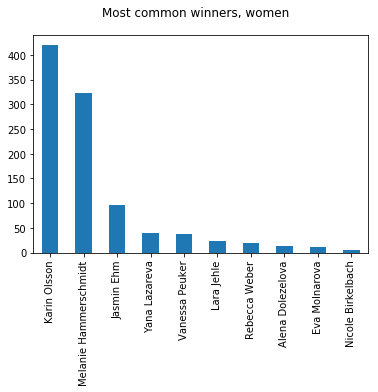

In [63]:
dtf = plot_most_common(medals_w)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, women')
fig.savefig('../FIG/winners_w')

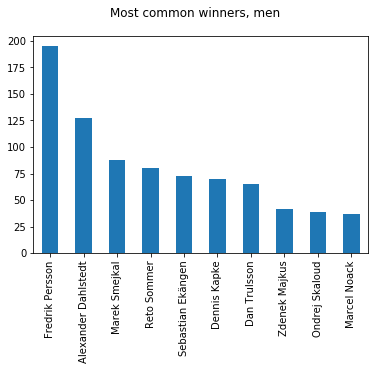

In [64]:
dtf = plot_most_common(medals_m)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, men')
fig.savefig('../FIG/winners_m')

In [94]:
from simulation.game import Game_lanelog
score = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).score
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).lanelog
print(score)
print(lanelog)

[5, 2]
[0, 0, -1, 0, 0, 0, 0, 0, 1, -1, 0, 0, 1, 1, 0, 0, 0, 0]


In [100]:
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL).lanelog
print(lanelog)
lanelog2  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL).lanelog
print(lanelog2)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, -1, -1, -1, 1, 1, -1, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 1, 1, -1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 0, 0, 0, 1, -1, 0, 1, 0, 0, -1, 0, -1, 0]


In [187]:
def getresdict(lanes):
    resdict = dict()
    for lane in lanes:
        resdict[lane] = 0
    return resdict
    
def addGame(p1,p2,lanes, resdict):
    for i,el in enumerate( Game_lanelog(p1,p2,'E1',DATA,lanes).lanelog):
        resdict[lanes[i]] = resdict[lanes[i]] + el 
    return resdict
    
import operator                             #Importing operator module
def plotSortedLanes(res_all):
    dc_sort = sorted(res_all.items(),key = operator.itemgetter(1),reverse = True)
    keys = [v[0] for v in dc_sort]
    vals = [v[1] for v in dc_sort]

    plt.figure(figsize=(13,5))
    barlist = plt.bar(range(len(vals)), vals, align='center')
    plt.xticks(range(len(vals)), keys)
    for i,el in enumerate(keys):
        try:
            LANES.index(el)
            barlist[i].set_color('r')
        except:
            pass
        

In [216]:
winners = [x[0] for x in medals_m]
letter_counts = Counter(winners).most_common(20)
names = [v[0] for v in letter_counts]
print(names)

['Fredrik Persson', 'Alexander Dahlstedt', 'Marek Smejkal', 'Reto Sommer', 'Sebastian Ekängen', 'Dennis Kapke', 'Dan Trulsson', 'Zdenek Majkus', 'Ondrej Skaloud', 'Marcel Noack', 'Alexander Geist', 'Igor Pantelimonov', 'Andreas Cederholm', 'Walter Erlbruch', 'Martin Jecny', 'Ivan Macho', 'Sebastian Piekorz', 'Sebastian Heine', 'Fabian Spies', 'Karel Molnar']


In [217]:
import numpy as np
np.random.choice(names)

'Ivan Macho'

0.5077695809135143
0.22794868380166022


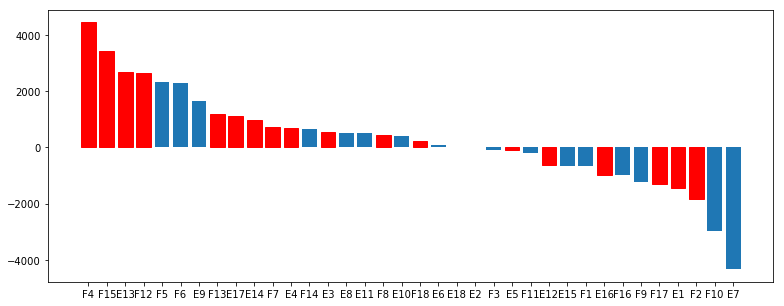

In [218]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Fredrik Persson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.061431242563318035
-0.1620345489443378


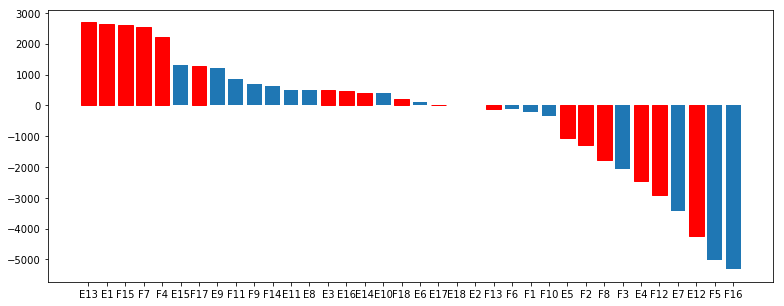

In [219]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Dan Trulsson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.2548229196659948
0.08398856325947104


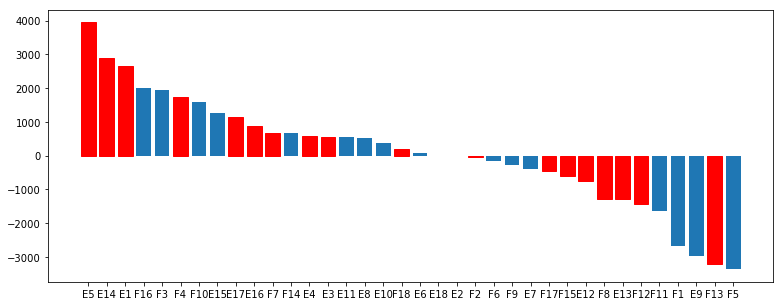

In [220]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Marek Smejkal'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

-0.2506475613116561
-0.10542790069004766


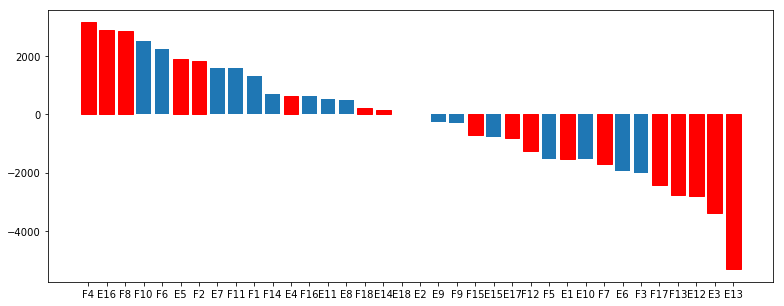

In [221]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Christian Gobetz'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

In [222]:
def get_normalized_score(result, lanes):
    count = 0
    score = 0
    for el in lanes:
        #print(el)
        count = count + abs(result[el])
        score = score + result[el]
    return (score/count)

print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))
    

-0.2506475613116561
-0.10542790069004766
